# Final Presentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used for pattern matching based on regular expressions
sns.set() # Configure the default style for all Seaborn plots to ensure a visually consistent and clean appearance

## Hotel Booking Demand Datasheet


### Source
Antonio, N., de Almeida, A. and Nunes, L. (2019) “Hotel booking demand datasets,” Data in Brief, 22, pp. 41–49. Available at: https://doi.org/10.1016/j.dib.2018.11.126.

Datasets : (https://www.kaggle.com/datasets/ramonakeira/hotel-booking-demand-complete/data)


### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [2]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# There's no unique identifier column in this dataset
# We can assume that each row is unique by adding an 'id' column.
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})
df_hotels

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
# "Check the column
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# Check the data types of columns
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [6]:
# Check the number of Null (or NaN) Value
df_hotels.isnull().sum()

,0
id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [7]:
type(df_hotels['children'].loc[0]) # Cek type data

numpy.float64

In [8]:
# Find the unique values in the 'children' column (that are not integers)
df_hotels[df_hotels['children'].apply(type) != int]['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [9]:
# Clean the 'children' column: Replace NaN with 0 and convert the entire column to integer
df_hotels['children'] = df_hotels['children'].fillna(0).astype(int)

In [10]:
type(df_hotels['children'].loc[0]) # Cek data type (cleaning)

numpy.int64

In [11]:
# Cleaning other data types that are not appropriate
# Cleaning the 'country' column: Replace NaN with 'unknown' (character/string)
df_hotels['country'] = df_hotels['country'].fillna('unknown')

# Cleaning the 'agent' column: Replace NaN with 0 and change the type to int
df_hotels['agent'] = pd.to_numeric(df_hotels['agent'], errors='coerce').fillna(0).astype(int)

# Cleaning the 'company' column: Replace NaN with 0 and change the type to int
df_hotels['company'] = pd.to_numeric(df_hotels['company'], errors='coerce').fillna(0).astype(int)

In [12]:
# Check the data types again
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119390 non-null  int64  
 12  babies          

In [13]:
# Check the number of Null (or NaN) Value again
df_hotels.isnull().sum()

,0
id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


The data is clean

In [14]:
# Check the number of unique value
df_hotels.nunique(axis=0)

,0
id,119390
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35


## Case 1
How many visitors have canceled reservations and those who have not?
And from that amount make a conclusion about the proportion!

In [15]:
df_hotels.is_canceled.value_counts()

,count
is_canceled,
0,75166
1,44224


In [16]:
df_hotels.is_canceled.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


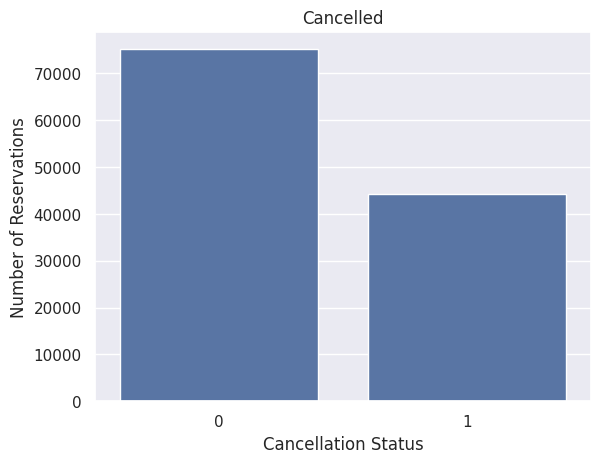

In [17]:
# Comparison of canceled and not canceled reservations
sns.countplot(data=df_hotels, x='is_canceled')
plt.xlabel('Cancellation Status')
plt.ylabel('Number of Reservations')
plt.title('Cancelled')
plt.show()

It turns out that a significant number of visitors cancel their reservations, with about 37% of total guests.

## Case 2

How many cancellations are there, and what is the percentage based on hotel type?



In [18]:
# Cancellations for City Hotel reservations
df_hotels[df_hotels.hotel=='City Hotel']['is_canceled'].value_counts()

,count
is_canceled,
0,46228
1,33102


In [19]:
df_hotels[df_hotels.hotel=='City Hotel']['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.58273
1,0.41727


In [20]:
# Cancellations for Resort Hotel reservations
df_hotels[df_hotels.hotel=='Resort Hotel']['is_canceled'].value_counts()

,count
is_canceled,
0,28938
1,11122


In [21]:
df_hotels[df_hotels.hotel=='Resort Hotel']['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.722366
1,0.277634


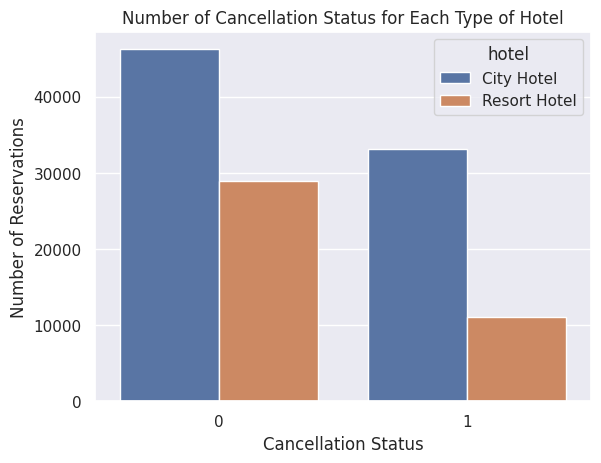

In [22]:
# Calculating the cancellation proportion for City Hotel and Resort Hotel
df_hotels['hotel'] = df_hotels['hotel'].astype('category')
df_hotels['is_canceled'] = df_hotels['is_canceled'].astype('category')

# Plotting with Seaborn
plt.figure()
sns.countplot(data=df_hotels, x='is_canceled', hue='hotel')

# Add labels and titles
plt.xlabel('Cancellation Status')
plt.ylabel('Number of Reservations')
plt.title('Number of Cancellation Status for Each Type of Hotel')

# Display the graph
plt.show()

## Case 3

1. Display the number of reservations for every arrival month for all hotels and by every type of hotel.

2. Which month has the highest number of reservations for every type of hotel?


In [23]:
# Filter to display only the data of guests who did not cancel their reservations. Save the result in the variable df_checkout
df_checkout = df_hotels[df_hotels.is_canceled==0]
df_checkout.shape

(75166, 33)

In [24]:
df_checkout.groupby('arrival_date_month').size()

,0
arrival_date_month,
April,6565
August,8638
December,4409
February,5372
January,4122
July,7919
June,6404
March,6645
May,7114


In [25]:
df_checkout.groupby(['hotel', 'arrival_date_month'], observed=True).size()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September             2102
dtype: int64

In [26]:
# Mapping months to numbers
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [27]:
# Add the column 'arrival_date_month_num' with the month numbers
df_checkout_2 = df_checkout.copy()
df_checkout_2['arrival_date_month_num'] = df_checkout_2['arrival_date_month'].map(month_dict)

df_checkout_2.groupby(['hotel', 'arrival_date_month_num'], observed=True).size()

hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10                        2577
              11                        1976
              12                        2017
dtype: int64

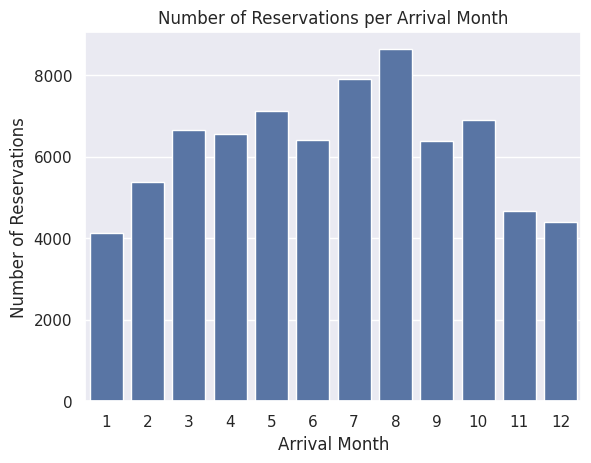

In [28]:
# Display the number of reservations for each arrival month
sns.countplot(data=df_checkout_2, x='arrival_date_month_num')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations per Arrival Month')
plt.show()

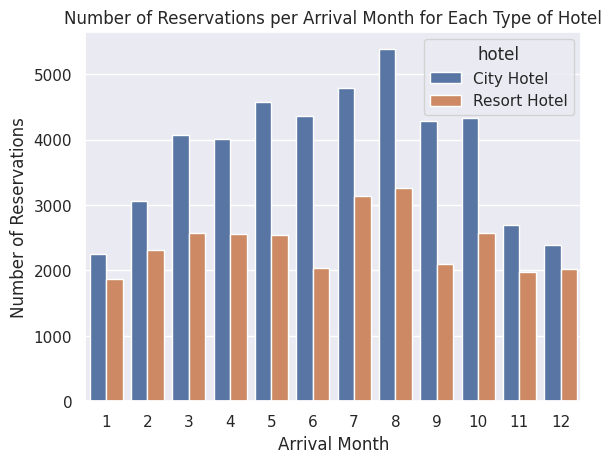

In [29]:
# Display the number of reservations for each arrival month for each hotel type.
sns.countplot(data=df_checkout_2, x='arrival_date_month_num', hue='hotel')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations per Arrival Month for Each Type of Hotel')
plt.show()

## Case 4

1. Create a new column called arival_date that contains complete information about the year, month, and day of arrival.

2. Change the column type to datetime by combining the year, month, and day into the format yyyy-mm-dd.

Combining year, month, and day into the format `yyyy-mm-dd`.

In [30]:
# Copy DataFrame
df_checkout_3 = df_checkout_2.copy()

# Step 1: Convert the column arrival_date_month_num to a string
df_checkout_3['arrival_date']=\
    df_checkout_3['arrival_date_year'].astype('str') + '-' +\
    df_checkout_3.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
    df_checkout_3.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

In [31]:
# Step 2: Add zero padding so that '1' becomes '01'
df_checkout_3['arrival_date'] = pd.to_datetime(df_checkout_3.arrival_date) # Convert arrival_date from string to datetime
df_checkout_3['arrival_date']

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


## Case 5

Based on time-series data using the arrival_date column.

Create two dataframes that show :

1. Daily total reservations(df_reservations_per_day)
2. Average daily reservations for every week (df_avg_reservations_weekly)

What is the difference between the data shown in (df_reservations_per_day) and (df_avg_reservations_weekly) ?

In [32]:
# Total daily reservations
df_reservations_per_day = df_checkout_3.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'Number_of_Reservations'})
df_reservations_per_day

,arrival_date,Number_of_Reservations
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
...,...,...
788,2017-08-27,125
789,2017-08-28,147
790,2017-08-29,81
791,2017-08-30,62


In [33]:
# Average daily reservations per week
df_avg_reservations_weekly = df_checkout_3.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'Number_of_Reservations'}).\
resample('W',on='arrival_date')['Number_of_Reservations'].mean().reset_index()

df_avg_reservations_weekly

,arrival_date,Number_of_Reservations
0,2015-07-05,51.600000
1,2015-07-12,40.571429
2,2015-07-19,53.857143
3,2015-07-26,53.000000
4,2015-08-02,47.142857
...,...,...
109,2017-08-06,101.000000
110,2017-08-13,98.000000
111,2017-08-20,103.714286
112,2017-08-27,103.142857


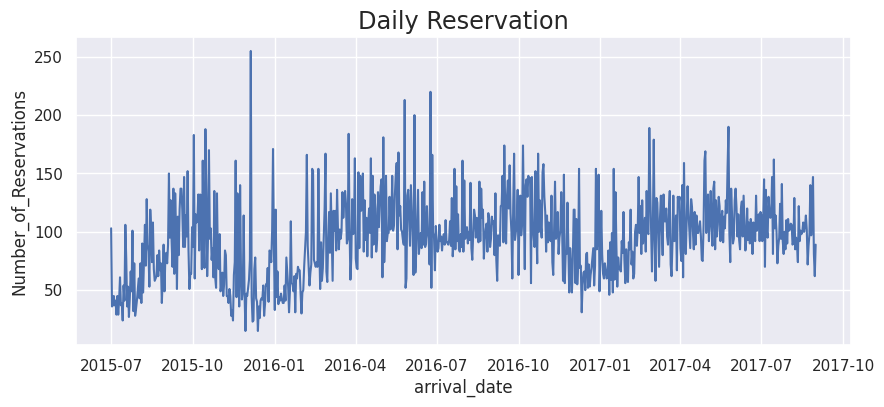

In [34]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_reservations_per_day  , x='arrival_date', y='Number_of_Reservations')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

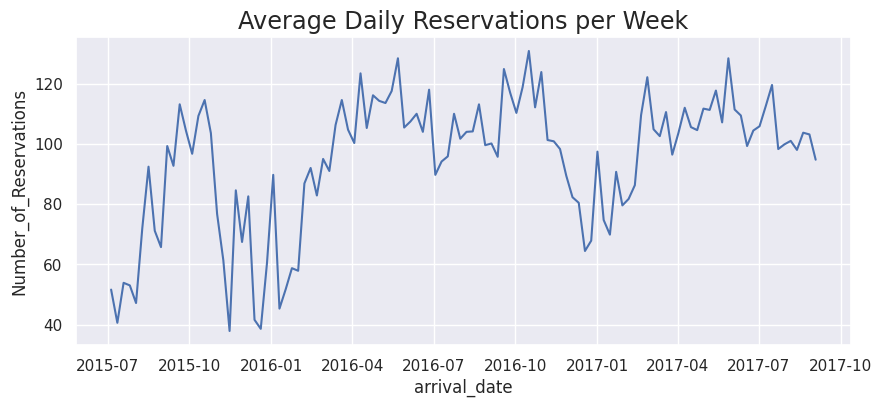

In [35]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_reservations_weekly, x='arrival_date', y='Number_of_Reservations')
plt.title('Average Daily Reservations per Week', fontsize='x-large')
plt.show()

## Case 6

1. What is the average ADR (Average Daily Rate) based on hotel type and `customer_type`?
2. Which customer type has the highest ADR for each type of hotel?

In [36]:
df_checkout_3.groupby(['hotel', 'customer_type'], observed=False)['adr'].mean()

hotel         customer_type  
City Hotel    Contract           108.929255
              Group               87.398712
              Transient          110.423280
              Transient-Party     93.705007
Resort Hotel  Contract            78.581674
              Group               77.306575
              Transient           96.001928
              Transient-Party     77.204010
Name: adr, dtype: float64

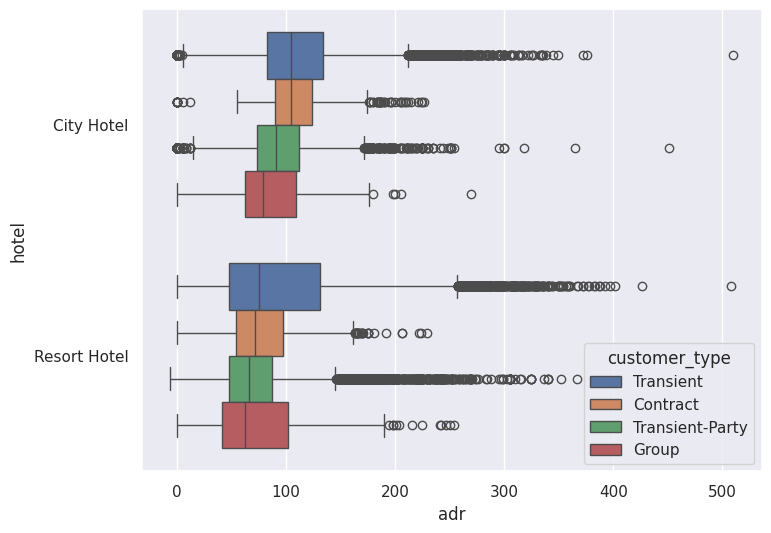

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout_3, x='adr', y='hotel',hue='customer_type')
plt.show()

## Case 7

What is the maximum number of guests per reservation?

In [38]:
# Create an explicit copy of the DataFrame
df_checkout = df_checkout.copy()

# Add a column for total_guest
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

# Select the row with the maximum total_guest, then transpose (T)
df_checkout[df_checkout.total_guest == df_checkout.total_guest.max()].T

,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
